In [81]:
#Imported the necessary packages for analysis
import pandas as pd
import numpy as np
import math as mat
import matplotlib.pyplot as plt
import seaborn as sns

#Loaded the dataset
jobdf= pd.read_csv("C:/Users/ADMIN/Downloads/ai_job_dataset.csv")
jobdf.head(20)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,2024-08-31,2024-10-04,819,5.9,Neural Networks Co
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,"R, Docker, MLOps",Associate,3,Gaming,2024-12-29,2025-02-28,1936,6.3,DataVision Ltd
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,2024-06-07,2024-07-01,1286,7.6,Cloud AI Solutions
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,"Hadoop, Git, Mathematics, Python",PhD,7,Government,2024-11-04,2024-11-24,551,9.3,Quantum Computing Inc
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,2024-10-20,2024-11-06,2340,5.8,Cloud AI Solutions


In [ ]:
#Filtered the dataset to get remote workers
remote_jobbers= jobdf.loc[(jobdf['company_location'] != jobdf['employee_residence']) & (jobdf['remote_ratio']== 100)]
remote_jobbers.head(10)

In [83]:
#Filtered the dataset to get hybrid workers
hybrid_jobbers= jobdf.loc[(jobdf['company_location'] != jobdf['employee_residence']) & (jobdf['remote_ratio']== 50)]
hybrid_jobbers.head(10)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
26,AI00027,ML Ops Engineer,80979,USD,MI,CT,Australia,S,India,50,"Hadoop, Linux, Git, Scala",Master,2,Media,2024-11-18,2025-01-18,2109,7.7,TechCorp Inc
45,AI00046,AI Research Scientist,174663,USD,SE,CT,United States,M,Singapore,50,"Data Visualization, Statistics, R",Associate,7,Media,2024-01-10,2024-03-22,1151,5.4,DeepTech Ventures
49,AI00050,AI Consultant,124871,USD,EX,FL,Austria,M,Finland,50,"Hadoop, AWS, Linux, Docker, Statistics",PhD,19,Media,2025-03-10,2025-05-17,1556,8.0,Autonomous Tech
63,AI00064,AI Software Engineer,99972,USD,MI,PT,Australia,M,Canada,50,"Java, R, Deep Learning, NLP, Azure",PhD,4,Technology,2024-02-20,2024-03-15,799,6.5,Cloud AI Solutions
86,AI00087,Autonomous Systems Engineer,33314,USD,EN,CT,Israel,S,India,50,"SQL, Kubernetes, Docker",Bachelor,0,Manufacturing,2025-04-16,2025-06-15,1207,8.3,Future Systems
98,AI00099,Machine Learning Researcher,290199,USD,EX,CT,Switzerland,L,Denmark,50,"Python, AWS, Kubernetes, Deep Learning",Master,12,Retail,2025-01-12,2025-03-07,1137,5.6,Smart Analytics
106,AI00107,AI Research Scientist,152658,USD,EX,FL,South Korea,L,United Kingdom,50,"Data Visualization, PyTorch, Spark, TensorFlow",Associate,16,Automotive,2024-01-28,2024-03-17,548,9.0,TechCorp Inc
121,AI00122,Principal Data Scientist,64531,USD,EN,PT,China,L,Netherlands,50,"Git, SQL, Scala, Python, Computer Vision",PhD,0,Retail,2025-03-26,2025-04-13,1645,7.0,Smart Analytics
139,AI00140,Principal Data Scientist,122598,USD,SE,FT,Sweden,S,India,50,"Linux, AWS, Computer Vision, Deep Learning",Associate,9,Media,2025-01-05,2025-02-13,1181,5.2,Digital Transformation LLC
153,AI00154,AI Research Scientist,92445,EUR,MI,CT,Netherlands,M,Finland,50,"Linux, Python, Scala, Docker",Bachelor,4,Technology,2024-10-22,2024-12-24,826,9.2,DataVision Ltd


In [84]:
#Filtered the dataset to get on-site workers
noremote_jobbers= jobdf.loc[(jobdf['company_location'] != jobdf['employee_residence']) & (jobdf['remote_ratio']== 0)]
noremote_jobbers.head(10)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
15,AI00016,AI Product Manager,78846,GBP,EN,PT,United Kingdom,L,Israel,0,"Linux, Statistics, Deep Learning",PhD,0,Consulting,2024-09-28,2024-10-26,2059,9.6,DataVision Ltd
20,AI00021,Data Engineer,134197,USD,MI,FT,Norway,M,France,0,"Deep Learning, AWS, Azure",Bachelor,3,Telecommunications,2024-06-21,2024-08-28,969,9.6,AI Innovations
27,AI00028,Data Analyst,52997,USD,MI,PT,Austria,M,Singapore,0,"Mathematics, Kubernetes, TensorFlow, Tableau, ...",PhD,2,Government,2025-01-10,2025-02-20,2101,8.6,Predictive Systems
34,AI00035,Deep Learning Engineer,150864,USD,SE,FL,Sweden,L,Singapore,0,"R, GCP, MLOps, Linux",PhD,8,Consulting,2024-10-26,2024-12-25,1504,7.9,Smart Analytics
35,AI00036,Head of AI,126942,USD,EX,CT,Finland,L,Netherlands,0,"Git, Hadoop, Data Visualization",Associate,10,Finance,2024-01-31,2024-02-26,1261,9.9,Autonomous Tech
40,AI00041,Data Scientist,96956,USD,MI,FT,United States,M,China,0,"Data Visualization, Azure, Spark, MLOps",Bachelor,2,Telecommunications,2024-02-24,2024-03-09,761,5.3,DataVision Ltd
59,AI00060,AI Software Engineer,110222,GBP,SE,FL,United Kingdom,S,France,0,"R, Spark, AWS",Associate,8,Media,2024-03-20,2024-05-05,1945,9.0,TechCorp Inc
67,AI00068,Machine Learning Engineer,316182,USD,EX,PT,Denmark,M,Canada,0,"Python, Scala, Statistics, Git",Associate,12,Finance,2025-02-09,2025-02-23,2452,7.0,Digital Transformation LLC
130,AI00131,AI Specialist,131756,EUR,SE,PT,Netherlands,M,Finland,0,"AWS, R, Spark",PhD,5,Technology,2024-08-03,2024-10-15,2308,7.9,AI Innovations


In [85]:
#Created a dataframe to contain evrage salary per degree
average_salary_per_educationreq= jobdf.groupby('education_required')['salary_usd'].mean().reset_index()

average_salary_per_educationreq.rename(columns={'education_required': 'Degree'}, inplace= True)
average_salary_per_educationreq.rename(columns={'salary_usd': 'Average Salary in USD'}, inplace= True)
average_salary_per_educationreq.head(4)

,Degree,Average Salary in USD
0,Associate,114605.708058
1,Bachelor,115861.629190
2,Master,117171.815902
3,PhD,113728.165579


Text(0.5, 1.0, 'Average Salary in USD per degree qualification')

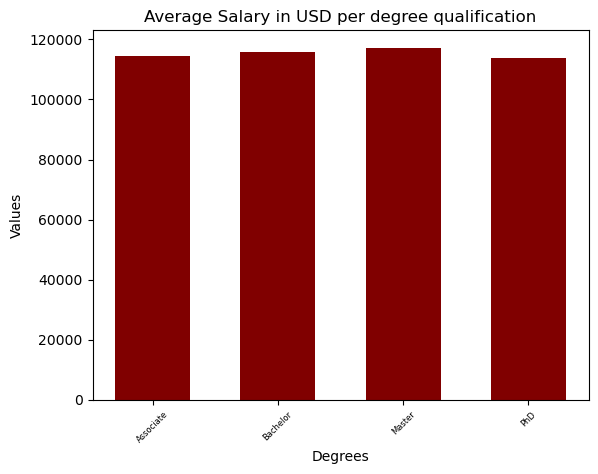

In [86]:
#Created a bar chart to visualize the data
plt.bar(average_salary_per_educationreq['Degree'], average_salary_per_educationreq['Average Salary in USD'], color ="maroon", width=0.6) 
plt.xlabel('Degrees')
plt.ylabel('Values')
plt.xticks(fontsize=6, rotation=45)
plt.title('Average Salary in USD per degree qualification')

In [87]:
#Created a dataframe to contain evrage salary per job type
average_salary_per_jobtype= jobdf.groupby('employment_type')['salary_usd'].mean().reset_index()

average_salary_per_jobtype.rename(columns={'employment_type': 'Job Type'}, inplace= True)
average_salary_per_jobtype.rename(columns={'salary_usd': 'Average Salary in USD'}, inplace= True)
average_salary_per_jobtype.head(100)

,Job Type,Average Salary in USD
0,CT,115918.919645
1,FL,114967.645290
2,FT,116338.137723
3,PT,114146.881909


Text(0.5, 1.0, 'Average Salary in USD per job type')

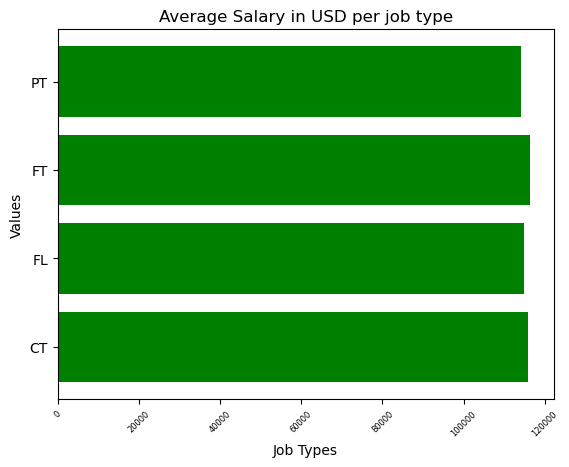

In [88]:
#Created a horizontal bar chart to visualize the data
plt.barh(average_salary_per_jobtype['Job Type'], average_salary_per_jobtype['Average Salary in USD'], color ="green") 
plt.xlabel('Job Types')
plt.ylabel('Values')
plt.xticks(fontsize=6, rotation=45)
plt.title('Average Salary in USD per job type')

In [89]:
#Created a dataframe to contain evrage salary per job title
average_salary_per_jobtitle= jobdf.groupby('job_title')['salary_usd'].mean().reset_index()

average_salary_per_jobtitle.rename(columns={'job_title': 'Job Title'}, inplace= True)
average_salary_per_jobtitle.rename(columns={'salary_usd': 'Average Salary in USD'}, inplace= True)
average_salary_per_jobtitle.head(100)

,Job Title,Average Salary in USD
0,AI Architect,117436.513619
1,AI Consultant,113671.870739
2,AI Product Manager,114680.909825
3,AI Research Scientist,117897.925926
4,AI Software Engineer,114273.201531
5,AI Specialist,120570.758242
6,Autonomous Systems Engineer,111396.557272
7,Computer Vision Engineer,113472.707182
8,Data Analyst,111321.180501
9,Data Engineer,115970.720961


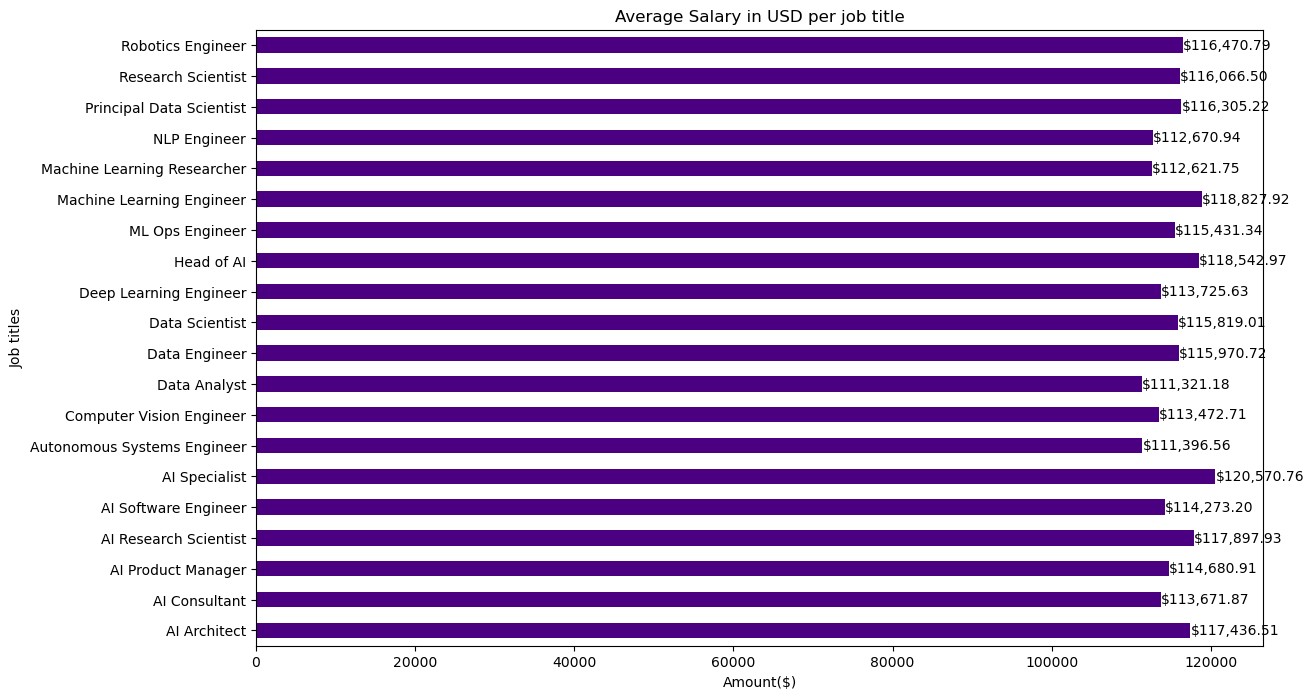

In [90]:
#Created a horizontal bar chart to visualize the data
ax = average_salary_per_jobtitle.plot(kind='barh',x='Job Title', y='Average Salary in USD', figsize=(13, 8), title='Average Salary in USD per job title', xlabel='Amount($)', ylabel='Job titles', legend=False, color="indigo")
ax.bar_label(ax.containers[0], label_type='edge', fmt='${:,.2f}') 
ax.margins(y=0.1)

In [91]:
#Created a dataframe to contain total number of jobs paid in different currencies
total_salary_per_currency= jobdf.groupby('salary_currency')['job_id'].count().reset_index()

total_salary_per_currency.rename(columns={'salary_currency': 'Salary Currency'}, inplace= True)
total_salary_per_currency.rename(columns={'job_id': 'Total jobs paid in said currency'}, inplace= True)
total_salary_per_currency.head(100)

,Salary Currency,Total jobs paid in said currency
0,EUR,2314
1,GBP,729
2,USD,11957


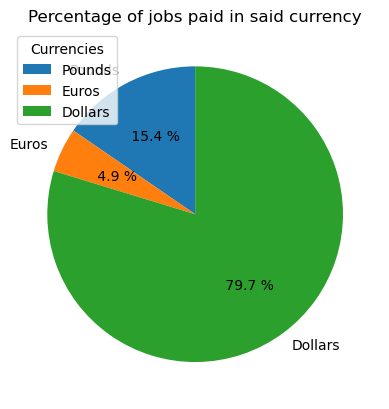

In [92]:
#Created a pie chart to visualize the data
plt.pie(total_salary_per_currency['Total jobs paid in said currency'], labels = {"Pounds", "Dollars", "Euros"},
                            
autopct ='% 1.1f %%', startangle=90) 
plt.legend(title= "Currencies")
plt.title("Percentage of jobs paid in said currency")
plt.show()

In [93]:
#Created a dataframe to contain average salary per experience level
total_experiencel_per_remoter= jobdf.groupby('experience_level')['salary_usd'].mean().reset_index()

total_experiencel_per_remoter.rename(columns={'experience_level': 'Experience'}, inplace= True)
total_experiencel_per_remoter.rename(columns={'salary_usd': 'Average Salary in USD'}, inplace= True)
total_experiencel_per_remoter.head(100)

,Experience,Average Salary in USD
0,EN,63133.377084
1,EX,187723.647340
2,MI,87955.471833
3,SE,122187.657845


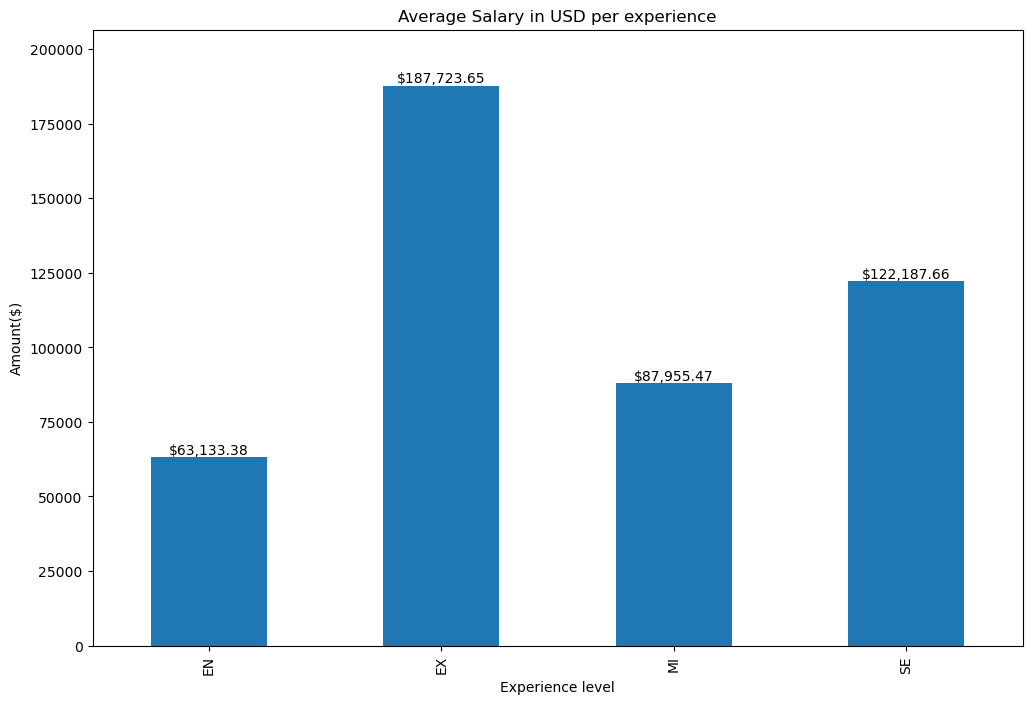

In [94]:
#Created a bar chart to visualize the data
ax = total_experiencel_per_remoter.plot(kind='bar',x='Experience', y='Average Salary in USD', figsize=(12, 8), title='Average Salary in USD per experience', xlabel='Experience level', ylabel='Amount($)', legend=False)
ax.bar_label(ax.containers[0], label_type='edge', fmt='${:,.2f}') 
ax.margins(y=0.1)

In [95]:
#Created a dataframe to contain total number of jobs per remote ratio
total_jobs_per_remoter1= jobdf.groupby('remote_ratio')['experience_level'].count().reset_index()

total_jobs_per_remoter1.rename(columns={'experience_level': 'Total jobs'}, inplace= True)
total_jobs_per_remoter1.rename(columns={'remote_ratio': 'Remote ratio'}, inplace= True)
total_jobs_per_remoter1.head(100)

,Remote ratio,Total jobs
0,0,5075
1,50,5005
2,100,4920


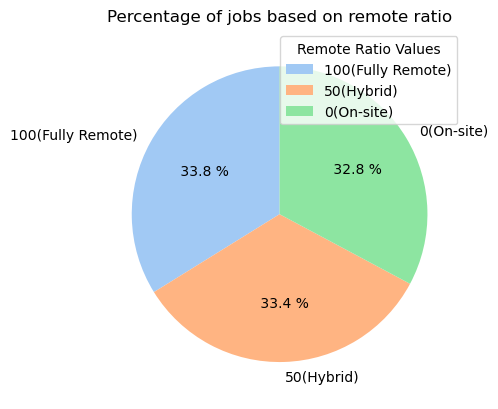

In [96]:
#Created a pie chart to visualize the data
plt.pie(total_jobs_per_remoter1['Total jobs'], labels = {"0(On-site)", "50(Hybrid)", "100(Fully Remote)"}, autopct ='% 1.1f %%', startangle=90, colors=sns.color_palette("pastel")) 
plt.legend(title= "Remote Ratio Values", loc="upper right")
plt.title("Percentage of jobs based on remote ratio")
plt.show()

In [97]:
#Created a dataframe to contain total number of on-site jobs per industry
noremote_perindust= noremote_jobbers.groupby('industry')['job_id'].count().reset_index()

noremote_perindust.rename(columns={'industry': 'Industry'}, inplace= True)
noremote_perindust.rename(columns={'job_id': 'Total jobs'}, inplace= True)
noremote_perindust.head(100)

,Industry,Total jobs
0,Automotive,75
1,Consulting,102
2,Education,91
3,Energy,96
4,Finance,94
5,Gaming,99
6,Government,95
7,Healthcare,95
8,Manufacturing,89
9,Media,108


In [98]:
#Created a dataframe to contain total number of remote jobs per industry
remote_perindust= remote_jobbers.groupby('industry')['job_id'].count().reset_index()

remote_perindust.rename(columns={'industry': 'Industry'}, inplace= True)
remote_perindust.rename(columns={'job_id': 'Total jobs'}, inplace= True)
remote_perindust.head(100)

,Industry,Total jobs
0,Automotive,95
1,Consulting,95
2,Education,92
3,Energy,91
4,Finance,95
5,Gaming,82
6,Government,71
7,Healthcare,96
8,Manufacturing,88
9,Media,102


In [99]:
#Merged the previous dataframes together
remotevsphys_indust = pd.merge(remote_perindust, noremote_perindust, on= "Industry", how="left")
remotevsphys_indust.rename(columns={'Total jobs_x': 'Total Remote Jobs'}, inplace= True)
remotevsphys_indust.rename(columns={'Total jobs_y': 'Total Physical jobs'}, inplace= True)
remotevsphys_indust.head(15)

,Industry,Total Remote Jobs,Total Physical jobs
0,Automotive,95,75
1,Consulting,95,102
2,Education,92,91
3,Energy,91,96
4,Finance,95,94
5,Gaming,82,99
6,Government,71,95
7,Healthcare,96,95
8,Manufacturing,88,89
9,Media,102,108


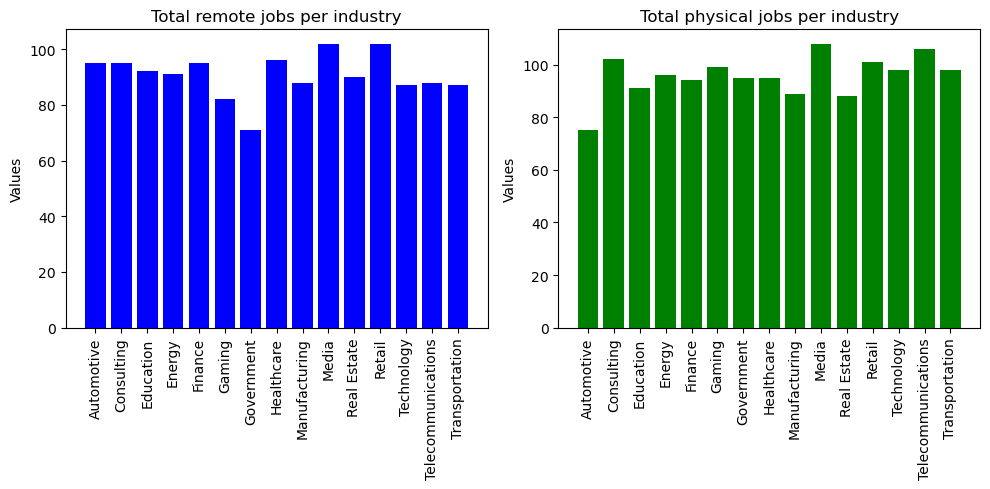

In [100]:
#Created a bar chart to visualize the data
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# First dataset
axes[0].bar(remotevsphys_indust["Industry"],remotevsphys_indust["Total Remote Jobs"], color='blue')
axes[0].tick_params(axis='x', labelrotation=90)
axes[0].set_title("Total remote jobs per industry")
axes[0].set_ylabel("Values")

# Second dataset
axes[1].bar(remotevsphys_indust["Industry"], remotevsphys_indust["Total Physical jobs"], color='green')
axes[1].tick_params(axis='x', labelrotation=90)
axes[1].set_title("Total physical jobs per industry")
axes[1].set_ylabel("Values")

plt.tight_layout()
plt.show()

In [101]:
#Created a dataframe to contain total number of hybrid jobs per industry
hybrid_perindust= hybrid_jobbers.groupby('industry')['job_id'].count().reset_index()

hybrid_perindust.rename(columns={'industry': 'Industry'}, inplace= True)
hybrid_perindust.rename(columns={'job_id': 'Total Hybrid jobs'}, inplace= True)
hybrid_perindust.head(100)

,Industry,Total Hybrid jobs
0,Automotive,96
1,Consulting,115
2,Education,78
3,Energy,107
4,Finance,106
5,Gaming,90
6,Government,85
7,Healthcare,99
8,Manufacturing,96
9,Media,86


Text(0.5, 1.0, 'Total Hybrid jobs per industry')

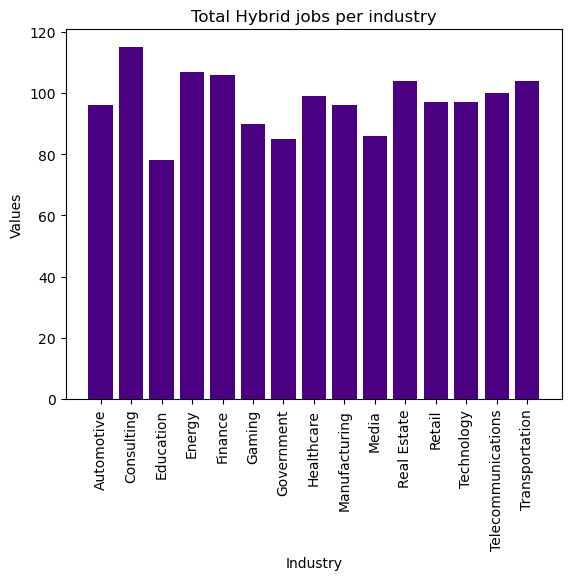

In [102]:
#Created a bar chart to visualize the data
plt.bar(hybrid_perindust['Industry'], hybrid_perindust['Total Hybrid jobs'], color ="indigo") 
plt.xlabel('Industry')
plt.ylabel('Values')
plt.xticks(fontsize=10, rotation=90)
plt.title('Total Hybrid jobs per industry')